122500


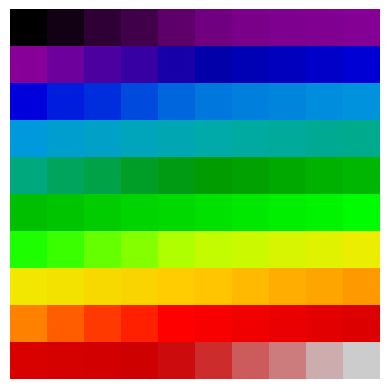

In [2]:
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt  # for visualization (optional)
# Load the image with PIL
image_pil = Image.open(r"E:\Christina\Result_Data\CIRRUS_Glaucoma\enface\enface_PSNASERI0003_Angiography 6x6 mm_7-3-2018_10-20-22_OD_sn0025_cube_z.tif") # .convert("L")

image = io.imread(r"E:\Christina\Result_Data\CIRRUS_Glaucoma\enface\enface_PSNASERI0003_Angiography 6x6 mm_7-3-2018_10-20-22_OD_sn0025_cube_z.tif")

# Convert to scikit-image format
image = img_as_float(np.array(image))
num_segments = 100  # Adjust the number of superpixels as needed
compactness = 10    # Adjust the compactness parameter as needed

print(image.size)

segments = slic(image, n_segments=num_segments, compactness=compactness, channel_axis=None)
plt.imshow(segments, cmap='nipy_spectral')
plt.axis('off')
plt.show()


[  0 255]
[  0 255]
[  0. 255.]
[  0 255]
(350, 350, 3)
(350, 350)
Found bbox (113, 119, 209, 239)


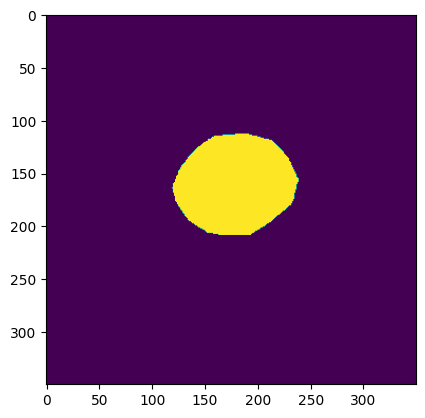

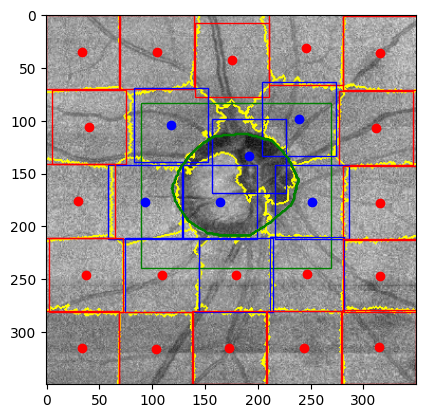

In [37]:
import imageio
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.measure import regionprops
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.color import gray2rgb
import matplotlib.patches as patches
import skimage

import cv2

img_file_path = r"E:\Christina\Result_Data\CIRRUS_Glaucoma\enface\enface_PSNASERI0003_Angiography 6x6 mm_7-3-2018_10-20-22_OD_sn0025_cube_z.tif"
#img_file_path = r"E:\Christina\Result_Data\CIRRUS_Glaucoma\enface\enface_PSNASERI0166_Angiography 6x6 mm_12-3-2018_10-17-52_OS_sn1861_FlowCube_z.tif"

img_file_path = r"E:\Christina\Result_Data\CIRRUS_Glaucoma\enface\enface_PSNASERI0154_Angiography 6x6 mm_11-22-2018_15-2-25_OD_sn1634_cube_z.tif"

img_file_path = r"E:\Christina\Result_Data\CIRRUS_Glaucoma\enface\enface_PSNASERI0049_Angiography 6x6 mm_8-14-2018_13-24-12_OD_sn0553_cube_z.tif"

img_file_path = r"E:\Christina\Result_Data\CIRRUS_Glaucoma\enface\enface_PSNASERI0044_Angiography 6x6 mm_8-7-2018_14-11-51_OD_sn0496_FlowCube_z.tif"


img_file_path = r"E:\Christina\Result_Data\PLEX_Healthy\enface\PE_GLAU0199 20210610\PE_GLAU0199_Angio (6mmx6mm)_6-10-2021_12-51-6_OD_sn1373_cube_z.tif"
mask_file_path = r"E:\Christina\Result_Data\PLEX_Healthy\enface_mask\mask_PE_GLAU0199_Angio (6mmx6mm)_6-10-2021_12-51-6_OD_sn1373_cube_z.png"

mask = io.imread(mask_file_path, as_gray=True)

print(np.unique(mask))

#ret,mask = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)

#print(np.unique(mask))

#mask = np.invert(mask)

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2126, 0.7152, 0.0722])

image = io.imread(img_file_path, as_gray=False)


image = gray2rgb(image)

image = skimage.transform.resize(image, (350,350),
                       anti_aliasing=True)
print(np.unique(mask))
mask = skimage.transform.resize(mask, (350,350),  preserve_range=True)
ret,mask = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)
print(np.unique(mask))





mask = mask.astype(int)
plt.imshow(mask)
print(np.unique(mask))
import cv2
print(image.shape)
print(mask.shape)
# image = imageio.imread(img_file_path, as_grey=False, pilmode="RGB")
segments_slic = 1+slic(image, n_segments=25, compactness=40)
regions = regionprops(segments_slic, intensity_image=rgb2gray(image))
fig, ax = plt.subplots()
ax.contour(mask, colors='green', linewidths=1)


#m = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#x,y,w,h = cv2.boundingRect(m)
# rect = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

prop = regionprops(mask)[0]


# print ('Image', image)
print('Found bbox', prop.bbox)
#cv2.rectangle(mask_0, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)

x,y,w,h, x2, y2 = prop.bbox[1]-30, prop.bbox[0]-30, prop.bbox[3]-prop.bbox[1]+60, prop.bbox[2]-prop.bbox[0]+60, prop.bbox[3]+30, prop.bbox[2]+30

ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor = 'green'))


for props in regions:
    cy, cx = props.centroid
    if cy < 50 or cy > 300 or cx < 50 or cx > 300:
        plt.plot(cx, cy, 'ro')
        ax.add_patch(patches.Rectangle((cx-35,cy-35), 70, 70, fill=False, edgecolor = 'red'))
    elif cy < y or cx < x or cy > y2 or cx > x2:
        plt.plot(cx, cy, 'ro')
        ax.add_patch(patches.Rectangle((cx-35,cy-35), 70, 70, fill=False, edgecolor = 'blue'))
    else:
        plt.plot(cx, cy, 'bo')
        ax.add_patch(patches.Rectangle((cx-35,cy-35), 70, 70, fill=False, edgecolor = 'blue'))
        
        


plt.imshow(mark_boundaries(image, segments_slic))
plt.show()

Found bbox (162, 170, 0, 299, 341, 3)


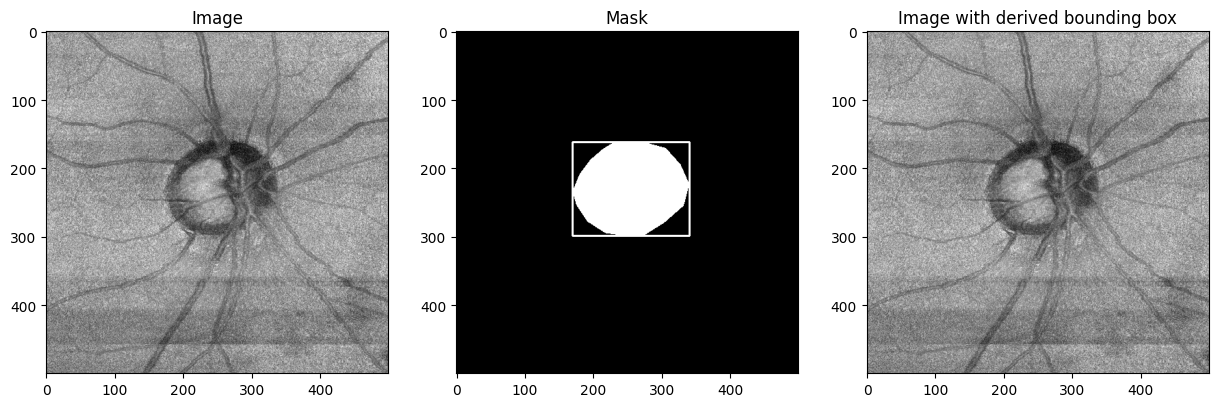

In [15]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
img_0 = cv2.imread(img_file_path)
mask_0 = cv2.imread(mask_file_path)
#
# 
lbl_0 = mask_0
props = regionprops(lbl_0)
print(props)
img_1 = img_0.copy()
# print ('Image', image)
for prop in props:
    print('Found bbox', prop.bbox)
    cv2.rectangle(mask_0, (prop.bbox[1], prop.bbox[0]), (prop.bbox[4], prop.bbox[3]), (255, 0, 0), 2)


ax1.imshow(img_0)
ax1.set_title('Image')
ax2.set_title('Mask')
ax3.set_title('Image with derived bounding box')
ax2.imshow(mask_0[...,0], cmap='gray')
ax3.imshow(img_1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

img_file_path = r"E:\Christina\Result_Data\PLEX_Healthy\enface\PE_GLAU0199 20210610\PE_GLAU0199_Angio (6mmx6mm)_6-10-2021_12-51-6_OD_sn1373_cube_z.tif"
mask_file_path = r"E:\Christina\Result_Data\PLEX_Healthy\enface_mask\mask_PE_GLAU0199_Angio (6mmx6mm)_6-10-2021_12-51-6_OD_sn1373_cube_z.png"

# Input data
img = io.imread(img_file_path, as_gray=False)
img = gray2rgb(img)

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.7, 500),
    500)

mask = morphology.opening(mask, morphology.disk(3))

mask = io.imread(mask_file_path, as_gray=False)
mask = np.invert(mask)

mask1 = mask + np.invert(mask)

mask1 = np.ones(shape=mask.shape)



# SLIC result
slic = segmentation.slic(img, n_segments=25, start_label=1, compactness=40)

# SLIC result
slic1 = segmentation.slic(img, n_segments=25, mask=mask1, start_label=1, compactness=40)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=24, mask=mask, start_label=1, compactness=40)

# Display result
fig, ax_arr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(9,9))
ax1, ax3, ax2, ax4, ax6, ax5 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(mask1, cmap='gray')
ax3.set_title('Mask 2')

ax4.imshow(segmentation.mark_boundaries(img, slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('SLIC')

ax5.imshow(segmentation.mark_boundaries(img, m_slic))
ax5.contour(mask, colors='red', linewidths=1)
ax5.set_title('maskSLIC')

ax6.imshow(segmentation.mark_boundaries(img, slic1))
ax6.contour(mask, colors='red', linewidths=1)
ax6.set_title('maskSLIC')



for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

Felzenszwalb number of segments: 16
SLIC number of segments: 25
Quickshift number of segments: 108
Watershed number of segments: 25


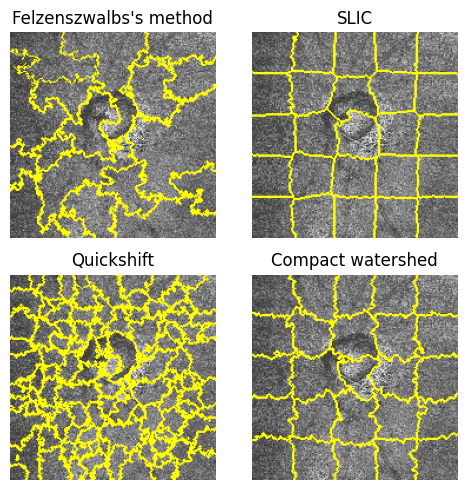

In [144]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

image = io.imread(img_file_path, as_gray=False)
image = gray2rgb(image)

img = img_as_float(image[::2, ::2])

segments_fz = felzenszwalb(img, scale=4, sigma=0.2, min_size=300)

segments_slic = slic(img, n_segments=25, compactness=40, sigma=1,
                     start_label=1)

segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.2)

gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=25, compactness=0.003)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(5, 5), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()